# CIFAR-10 Classification using Keras

## 1. Load CIFAR-10 Dataset

In [1]:
import keras
from keras.datasets import cifar10

# Load the pre-shuffled train and test dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2. Visualize the first 24 training images

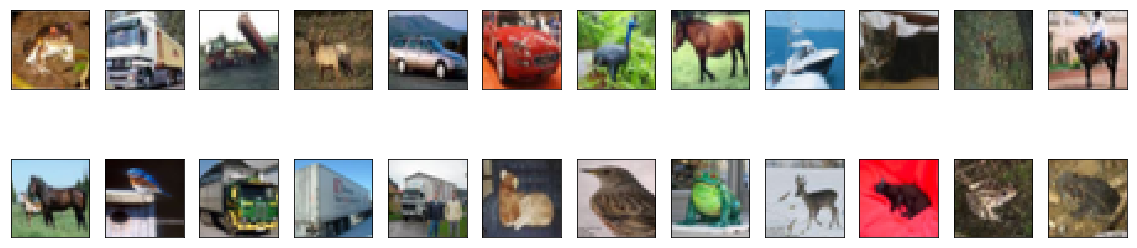

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(24):
    ax = fig.add_subplot(2, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

## 3. Rescale every pixel in images by 255

In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

## 4. Split the dataset into Training, Validation and Testing Datasets

In [4]:
# One-hot encode the labels
from keras.utils import np_utils

num_labels = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_labels)
y_test = np_utils.to_categorical(y_test, num_labels)

print("Number of classes in CIFAR-10 dataset: {}".format(num_labels))

Number of classes in CIFAR-10 dataset: 10


In [5]:
# Using 10% of the training dataset to be validation dataset
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid =  train_test_split(X_train, y_train, test_size=0.1)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 5. Build the Model Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dropout, Dense

print("Image Dimensions: {}".format(X_train[0].shape))

# Building the Model using CNN Architecture
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(filters=16, kernel_size=2, strides=1, padding='same', input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Convolution Layer 2
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Convolution Layer 3
model.add(Conv2D(filters=64, kernel_size=2, strides=1, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Dropout
model.add(Dropout(0.2))

# Flattening the output from Convolutional Layer
model.add(Flatten())

# Hidden Layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))

model.summary()


Image Dimensions: (32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64) 

## 6. Compile the model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 7. Train the model

In [9]:
from keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath='model_best_weights.hdf5', 
                      monitor='val_acc', 
                      mode='auto', 
                      save_best_only=True)

hist = model.fit(x=X_train, 
                 y=y_train, 
                 batch_size=32, 
                 epochs=40, 
                 verbose=2, 
                 callbacks=[callback], 
                 validation_data=(X_valid, y_valid), 
                 shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/40
 - 26s - loss: 0.3883 - acc: 0.8604 - val_loss: 0.8879 - val_acc: 0.7230
Epoch 2/40
 - 26s - loss: 0.3857 - acc: 0.8650 - val_loss: 0.8503 - val_acc: 0.7366
Epoch 3/40
 - 26s - loss: 0.3790 - acc: 0.8639 - val_loss: 0.8909 - val_acc: 0.7312
Epoch 4/40
 - 30s - loss: 0.3719 - acc: 0.8667 - val_loss: 0.8786 - val_acc: 0.7322
Epoch 5/40
 - 27s - loss: 0.3672 - acc: 0.8669 - val_loss: 0.8803 - val_acc: 0.7304
Epoch 6/40
 - 26s - loss: 0.3658 - acc: 0.8687 - val_loss: 0.9099 - val_acc: 0.7228
Epoch 7/40
 - 26s - loss: 0.3647 - acc: 0.8692 - val_loss: 0.8829 - val_acc: 0.7312
Epoch 8/40
 - 26s - loss: 0.3554 - acc: 0.8725 - val_loss: 0.9203 - val_acc: 0.7262
Epoch 9/40
 - 26s - loss: 0.3497 - acc: 0.8742 - val_loss: 0.9179 - val_acc: 0.7312
Epoch 10/40
 - 26s - loss: 0.3482 - acc: 0.8747 - val_loss: 0.9096 - val_acc: 0.7368
Epoch 11/40
 - 26s - loss: 0.3426 - acc: 0.8764 - val_loss: 0.9289 - val_acc: 0.7346
Epoch 12/40
 - 26s - loss

## 8. Load the weights

In [10]:
model.load_weights('model_best_weights.hdf5')

## 9. Evaluate the model

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [12]:
print("Testing Accuracy Score: {}".format(scores[1]))

Testing Accuracy Score: 0.7288


In [14]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

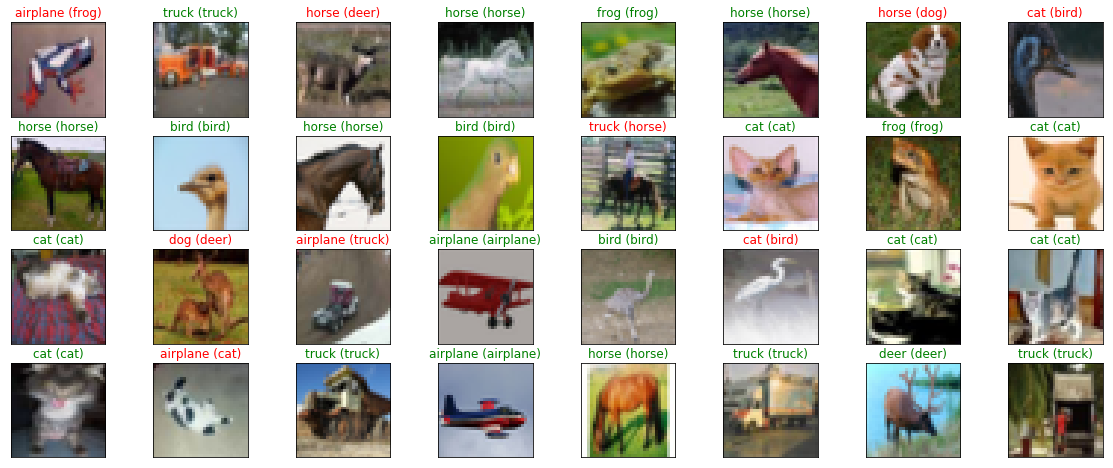

In [17]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))